# Ocena innowacyjności

Ocena innowacyjności jest narzędziem ilościowej oceny potencjału innowacyjnego produktów i usług. W tym notatniku przedstawiam metodę oceny innowacji, ustrukturyzowane podejście do oceny potencjału produktów i procesów w początkowej fazie projektowania i później. Metoda ta wykorzystuje narzędzia modelowania funkcjonalnego, w tym TRIZ, aby zaoferować obiektywną ocenę, która pomaga w wyborze najbardziej opłacalnych koncepcji do dalszego rozwoju. Jej celem jest optymalizacja procesu decyzyjnego, minimalizacja kosztów rozwoju i skrócenie czasu wprowadzenia produktu na rynek poprzez porównanie koncepcji projektowych w oparciu o ich znaczenie rynkowe i potencjalną rentowność. Przyjrzyjmy się praktycznemu przykładowi zastosowania tej metody w środowisku Python.

### Źródła
[1] Pryda, Bartosz, Marek Mysior, i Sebastian Koziołek. 2018. _„Method of Innovation Assessment of Products and Processes in the Initial Design Phase”_.  
W Automated Invention for Smart Industries, zredagowane przez Denis Cavallucci, Roland De Guio, i Sebastian Koziołek, 75–83.  
IFIP Advances in Information and Communication Technology. Cham: Springer International Publishing. https://doi.org/10.1007/978-3-030-02456-7_7.

[2] Koziołek, Sebastian. 2019. _Inżynieria wynalazczości: metodologia projektowania innowacyjnych systemów technicznych_  
Wrocław: Oficyna Wydawnicza Politechniki Wrocławskiej.

### Przygotowanie środowiska do pracy

Na początku importujemy niezbędne biblioteki, które będą wykorzystywane do:
- analizy i transformacji danych (_NumPy, Pandas_)  
- wizualizacji danych (_Matplotlib, Seaborn_)

Z folderu `src` zaimportowane są funkcje pomocnicze.


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

import src.utility.plot_settings
from src.utility.functions import calculate_area, rescale_values, calculate_results
from src.utility.visualize import plot_graph, plot_normal, print_results

Wynikiem oceny innowacyjności jest wykres przedstawiający pola powierzchni, wyznaczone dla każdego analizowanego atrybutu. Reprezentują one poziom użyteczności każdego z nich. Każdy punkt rzutowany jest na odpowiadająca mu charakterystykę, w zależności od przypisanego do danej cechy atrybutu. W tym notatniku przedstawiono sposób wykorzystania cech numerycznych w analizie. Poniższa komórka wyświetla przykładowy wykres dla losowych wartości parametrów oraz losowo im przypisanych atrybutów.

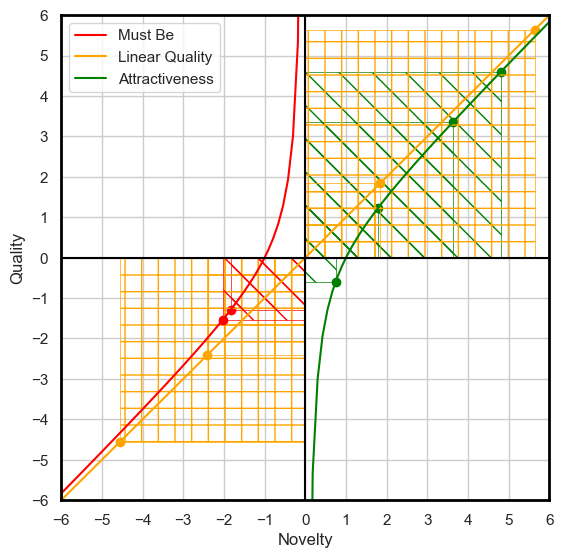

In [3]:
fig, ax = plot_graph()

# Add points to the graph
quality_list = np.random.uniform(-6, 6, 10)
attribute_list = np.random.choice(['LQ', 'MB', 'A'], 10)

for quality, attribute in zip(quality_list, attribute_list):
    novelty, area = calculate_area(quality, attribute)

    if attribute == 'LQ':
        color = 'orange'
        hatch = '+'
    elif attribute == 'MB':
        color = 'red'
        hatch = '\\'
    else:
        color = 'green'
        hatch = '\\'

    plt.scatter(novelty, quality, color=color, label=f'N = {novelty:.2f}\nQ = {quality:.2f}\nA = {area:.2f}')
    square = patches.Rectangle((0, 0), novelty, quality, hatch=hatch, fill=False, color=color, linewidth=0.5, label=None)
    
    plt.gca().add_patch(square)

plt.show()

## Proces oceny innowacyjności produktów i usług

Metoda składa się z następujących kroków:
1. Wczytanie i analiza danych dot. produktu lub usługi
2. Transformacja danych
3. Skalowanie danych
4. Wyznaczanie wartości pól
5. Sformułowanie oceny w zakresie użyteczności i kosztów.

### 1. Wczytanie i analiza danych dot. produktu lub usługi

Pierwszym krokiem metody jest wczytanie i analiza danych numerycznych. Potrzebne jest również zdefiniowanie atrybutu przypisanego do każdej z cech. 
Na początku analizy, wczytamy dane i zweryfikujemy, jakie kolumny i w jakich typach znajdują się w zbiorze.

In [4]:
bikes = pd.read_csv(f'bicycle.csv')
bikes_attr = pd.read_csv(f'bicycle_attributes.csv')
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ProductID   50 non-null     int64  
 1   Name        50 non-null     object 
 2   Weight      50 non-null     float64
 3   AeroEff     50 non-null     float64
 4   WheelSize   50 non-null     float64
 5   FrameSize   50 non-null     float64
 6   GearCount   50 non-null     float64
 7   MaxSpeed    50 non-null     float64
 8   BrakeEff    50 non-null     float64
 9   Comfort     50 non-null     float64
 10  Durability  50 non-null     float64
 11  RideSmooth  50 non-null     float64
dtypes: float64(10), int64(1), object(1)
memory usage: 4.8+ KB


W pliku `bicycle_attributes.csv` zawarte są dane dot. przypisanych atrybutów dla każdej z cech.

**Attractiveness**- atrybut nowego rozwiązania projektowego, które do tej pory nie było stosowane do celów podobnych do tych zaimplementowanych w badanym systemie. Często atrybut ten reprezentuje wprowadzenie nowych funkcji w ramach systemu.

**Linear Quality**- liniowy atrybut jakości, obejmuje rozwiązania projektowe, które zostały opracowane i zastosowane wcześniej niż w badanym systemie, jednak ze zwiększoną lub zmniejszoną efektywnością w stosunku do wcześniej znanych rozwiązań projektowych.

**Must-be**- atrybut podstawowych wymagań, obejmuje takie rozwiązania projektowe, które zostały opracowane i zastosowane wcześniej niż w badanym systemie i określa zgodność jedynie z podstawowymi oczekiwaniami użytkowników.

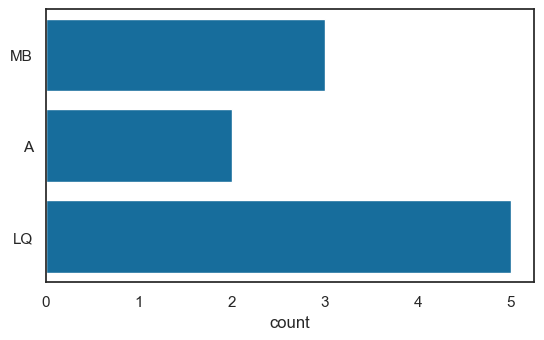

,Weight,AeroEff,WheelSize,FrameSize,GearCount,MaxSpeed,BrakeEff,Comfort,Durability,RideSmooth
0,MB,MB,A,A,LQ,MB,LQ,LQ,LQ,LQ


In [5]:
first_row_list = bikes_attr.iloc[0].tolist()
sns.countplot(first_row_list)
plt.show()
bikes_attr.drop(['ProductID', 'Name'], axis=1)


In [6]:
bikes['Name'].unique()

array(['Bicycle 1', 'Bicycle 2', 'Bicycle 3', 'Bicycle 4', 'Bicycle 5',
       'Bicycle 6', 'Bicycle 7', 'Bicycle 8', 'Bicycle 9', 'Bicycle 10',
       'Bicycle 11', 'Bicycle 12', 'Bicycle 13', 'Bicycle 14',
       'Bicycle 15', 'Bicycle 16', 'Bicycle 17', 'Bicycle 18',
       'Bicycle 19', 'Bicycle 20', 'Bicycle 21', 'Bicycle 22',
       'Bicycle 23', 'Bicycle 24', 'Bicycle 25', 'Bicycle 26',
       'Bicycle 27', 'Bicycle 28', 'Bicycle 29', 'Bicycle 30',
       'Bicycle 31', 'Bicycle 32', 'Bicycle 33', 'Bicycle 34',
       'Bicycle 35', 'Bicycle 36', 'Bicycle 37', 'Bicycle 38',
       'Bicycle 39', 'Bicycle 40', 'Bicycle 41', 'Bicycle 42',
       'Bicycle 43', 'Bicycle 44', 'Bicycle 45', 'Bicycle 46',
       'Bicycle 47', 'Bicycle 48', 'Bicycle 49', 'Bicycle 50'],
      dtype=object)

Dane zawierają 12 kolumn, z czego pierwsze dwie stanowią opis poszczególnych wierszy tabeli. Każdy produkt nazwany jest w formacie `Bicycle i`, gdzie i odpowiada nr porządkowemu. 
Z uwagi na to, że pierwsze dwie kolumny nie zawierają danych dot. analizowanych cech, do dalszej analizy zostaną one odrzucone. Wykorzystamy do tego celu metodę `.drop` i przeanalizujmy dane statystyczne dot. każdej kolumny.

In [7]:
bikes_data = bikes.drop(columns=['ProductID', 'Name'])
bikes_data.describe()

,Weight,AeroEff,WheelSize,FrameSize,GearCount,MaxSpeed,BrakeEff,Comfort,Durability,RideSmooth
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,14.549052,7.026671,25.941069,55.419484,7.977963,29.894116,2.474819,4.736926,20.805425,7.467951
std,1.867338,1.311487,1.523120,4.468566,2.482841,5.403428,0.193239,0.945578,6.617871,1.713605
min,11.080660,3.070382,23.121843,47.425764,4.453607,13.793663,2.128019,2.930640,10.802390,4.662798
25%,13.278042,6.255833,24.676085,51.280550,6.276269,26.623215,2.324991,4.003570,15.065488,6.241255
50%,14.531710,7.069120,26.025287,55.968187,7.770785,30.200088,2.460684,4.594321,20.243894,7.157737
75%,15.672551,7.880611,26.764781,57.949343,8.768352,33.732541,2.617104,5.332029,24.645376,8.276617
max,18.704556,9.346965,29.694863,68.600846,19.359493,40.665167,3.032049,6.944574,37.271329,13.677828


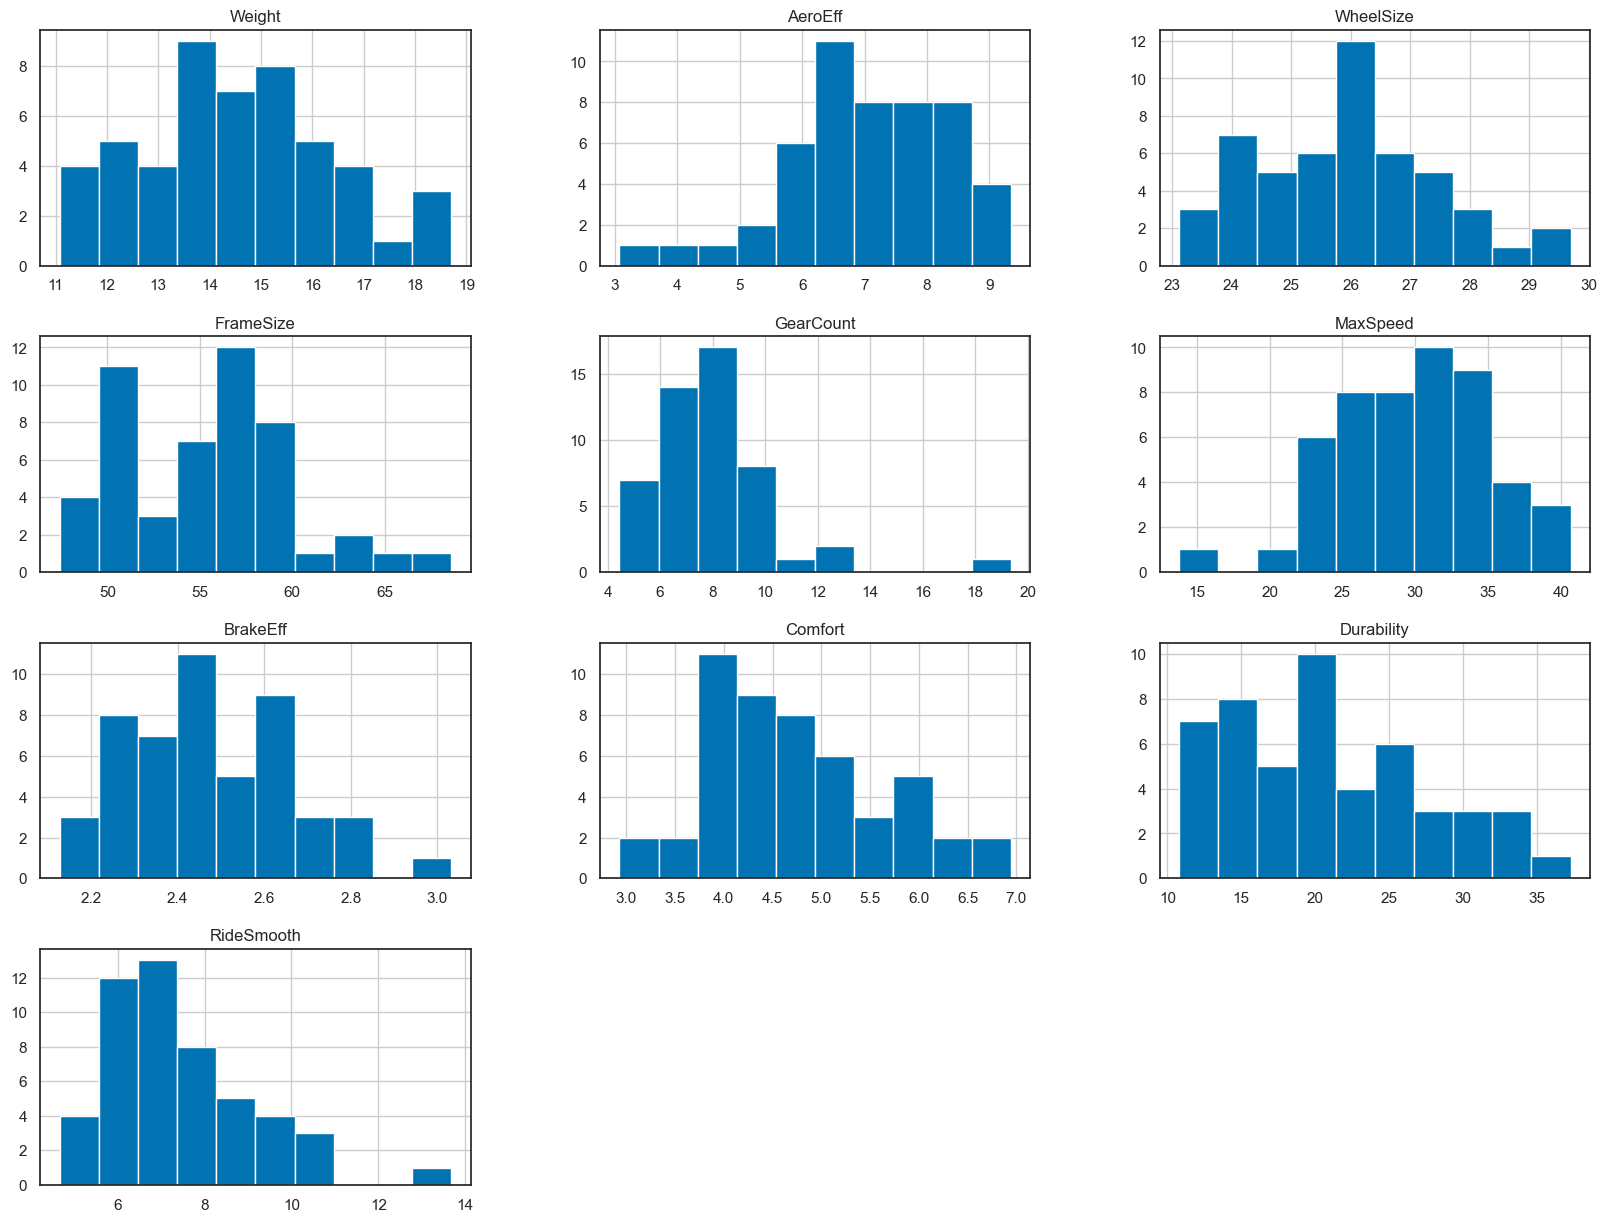

In [8]:
bikes_data.hist(figsize=(20, 15))
plt.show()

Analizując powyższe dane liczbowe oraz histogramy każdej z cech można zauważyć, że przynajmniej część cech nie cechuje się normalnym rozkładem wartości. Jest tak prawdopodobnie dla cech:
- `GearCount`
- `BrakeEff`
- `Comfort`
- `Durability`
- `RideSmooth`

Dla tych cech, **konieczne jest przeprowadzenie transformacji, celem zmiany rozkładu na normalny**. Można do tego wykorzystać funkcje logarytmiczne lub wykładnicze. Oznacza to zmianę jednostki oraz wartości każdej z cech. 

Dla pełnej analizy, poniższy blok kodu generuje wykresy pokazujące wizualne różnice pomiędzy występującym rozkładem a teoretycznym rozkładem normalnym.

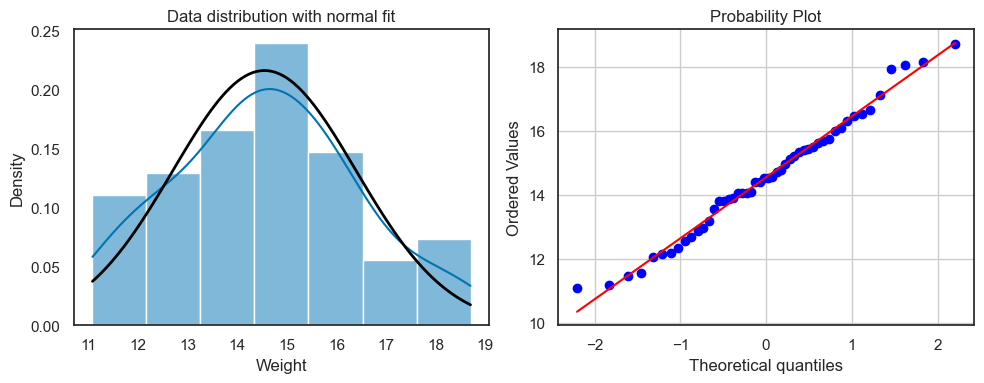

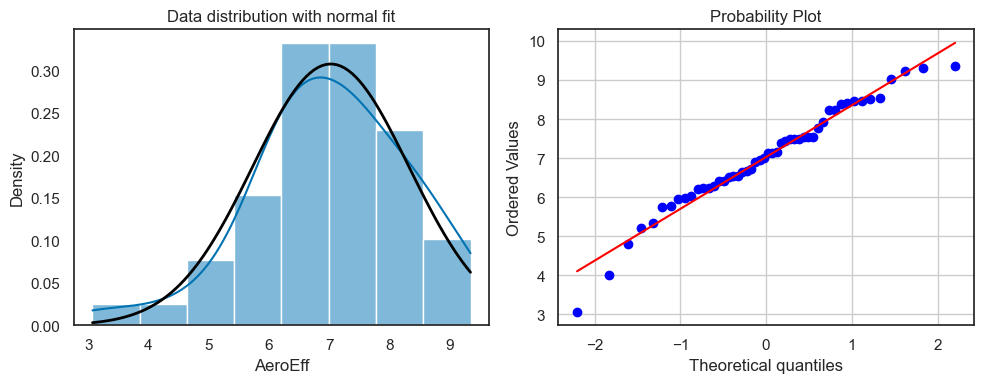

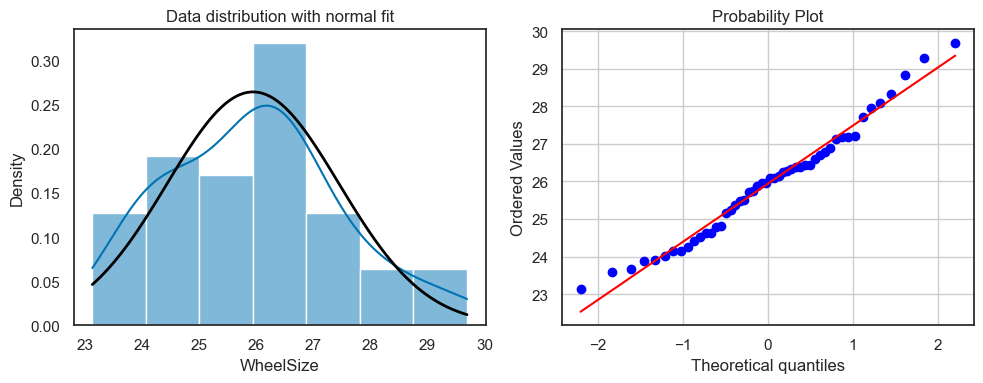

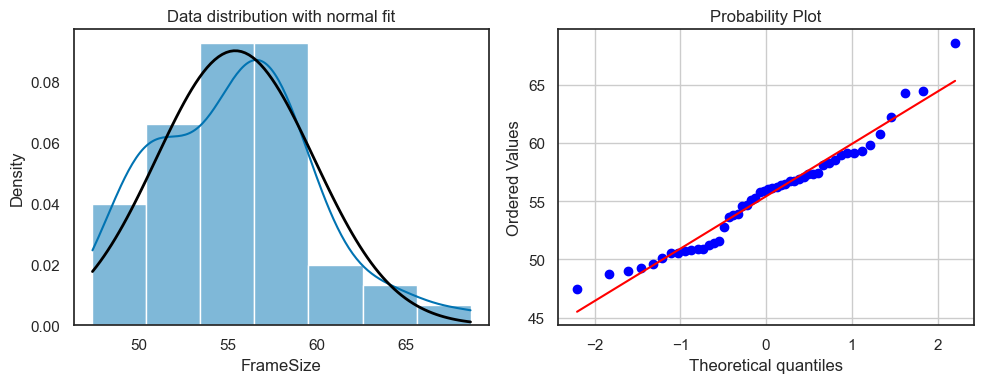

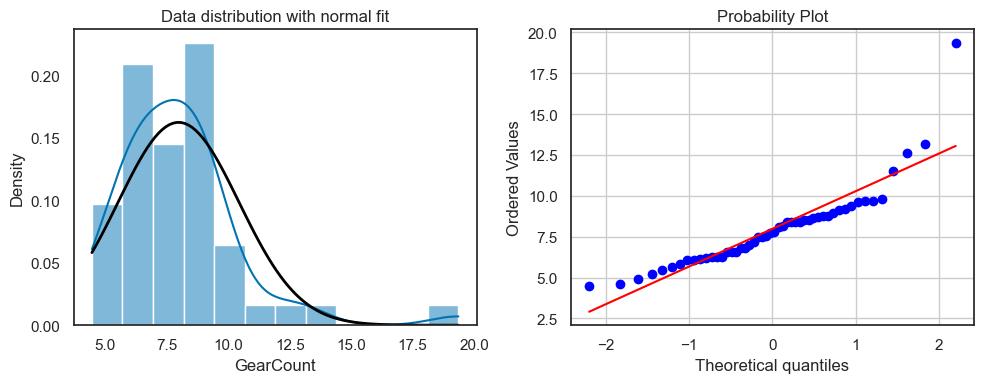

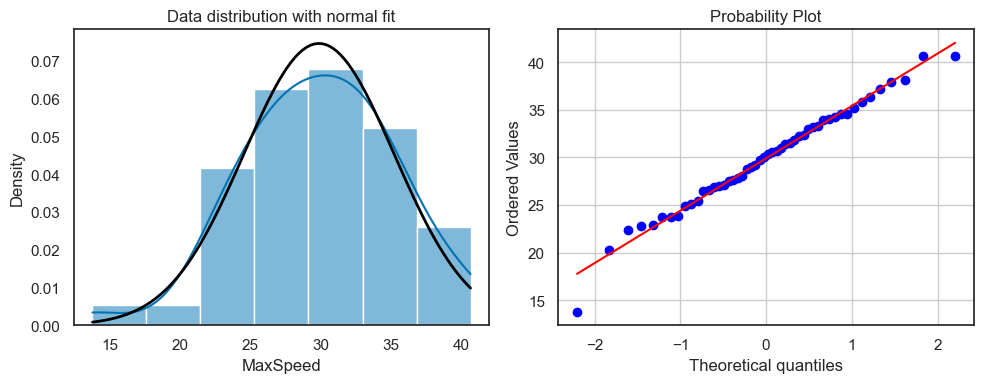

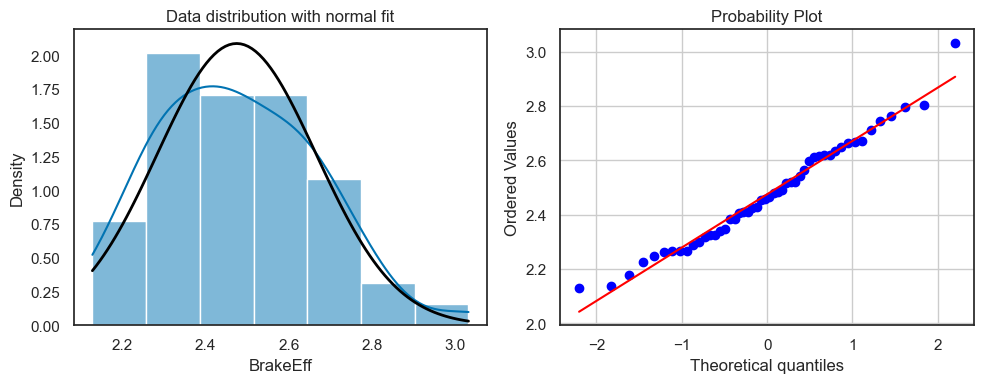

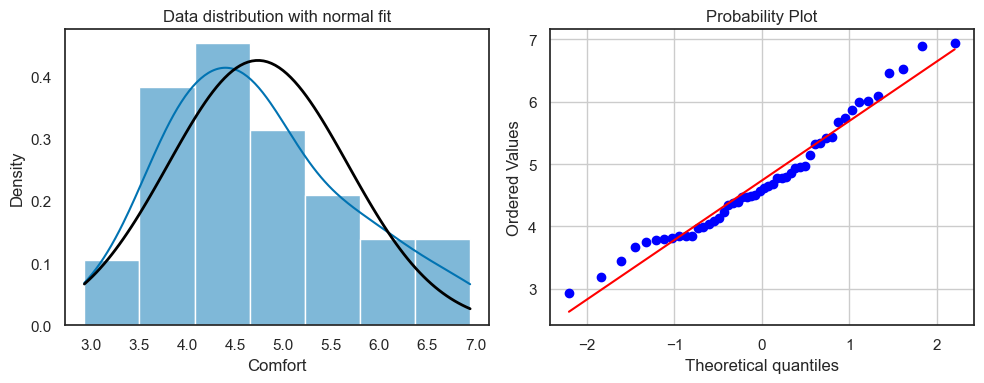

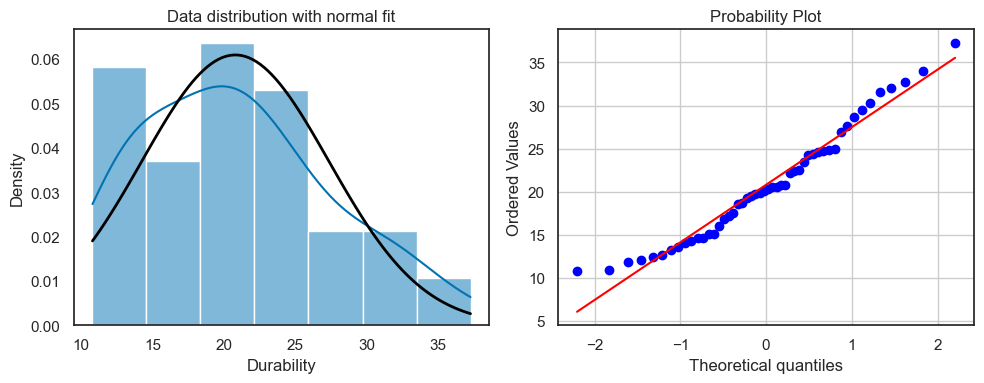

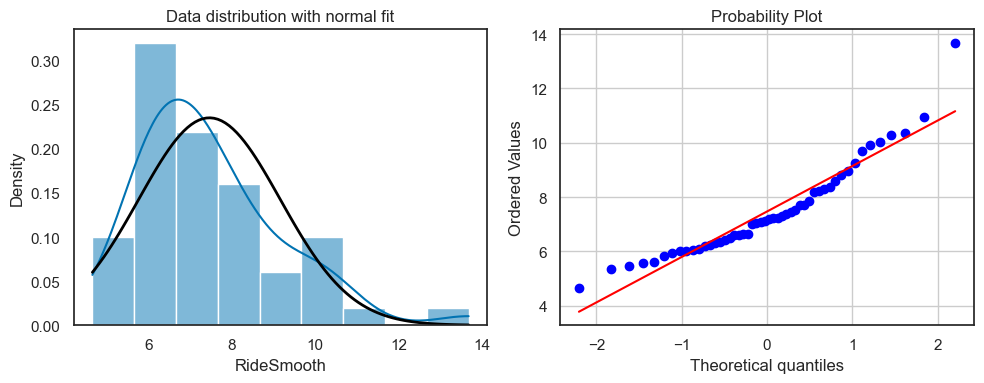

In [10]:
for col in bikes_data.columns:
    fig, ax = plot_normal(bikes_data[col])

Z powyższych wykresów można odczytać zgodność dopasowania teoretycznego rozkładu normalnego z rzeczywistym rozkładem każdej cechy. Dla cech niewykazujących cech rozkładu normalnego, trzeba dokonać ich transformacji.

### 2. Transformacja danych

Transformacja danych polega na zastosowaniu takich funkcji na zbiorze danych, żeby rozkład tych danych wykazywał cechy rozkładu normalnego. Wówczas, wartości będą prawidłowo zrzutowane na wykres. Kluczową cechą rozkładu normalnego jest, że moda, mediana oraz wartość średniasą sobie równe (teoretycznie) lub są do siebie bardzo zbliżone (dane rzeczywiste). 

**UWAGA**  
Zmiana rozkładu oznacza, że odczytując dane dot. danego parametru, będą one wyrażone w nowej jednostce. Żeby powrócić do pierwotnych wartości, trzeba wykonać odwrotną transformację. Wykorzystamy transformację z wykorzystaniem funkcji `np.log` (logarytm naturalny). Typowo stosowane funkcje transformacyjne to:
- `np.sqrt`
- `np.log`
- `np.log10`
- `x ** 2`

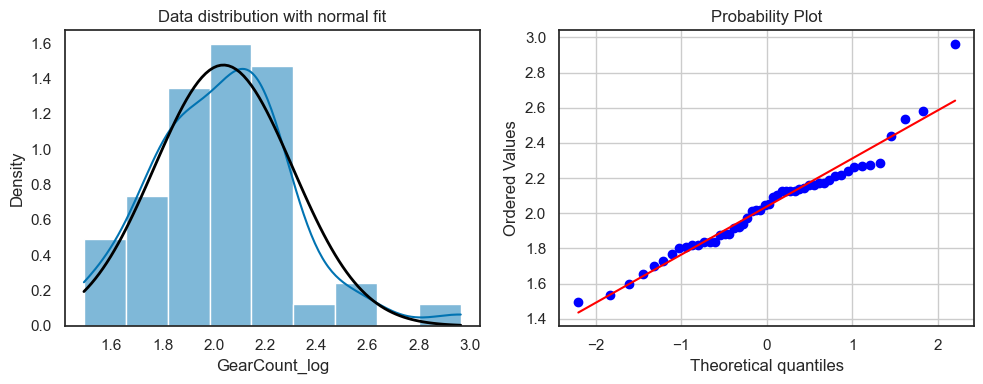

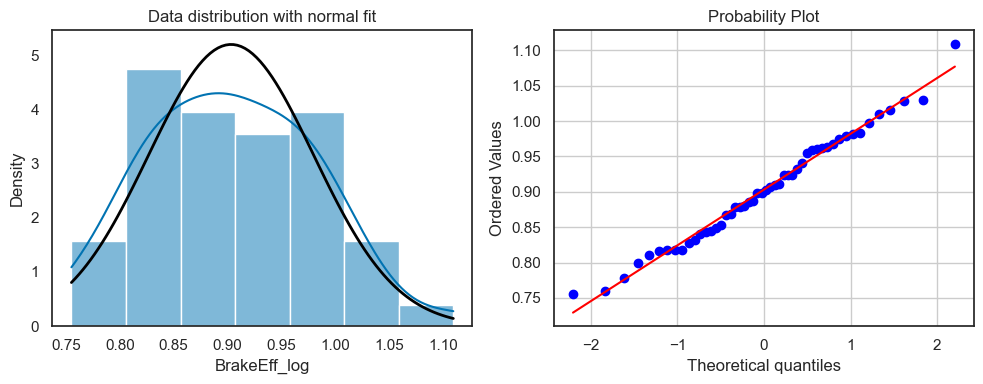

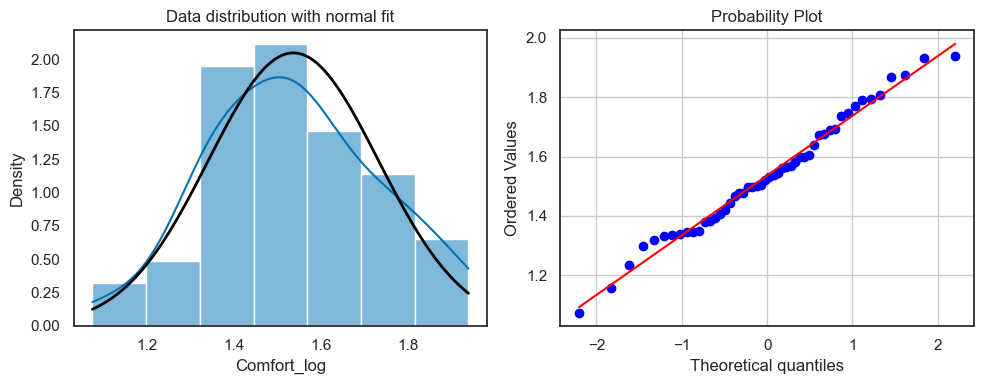

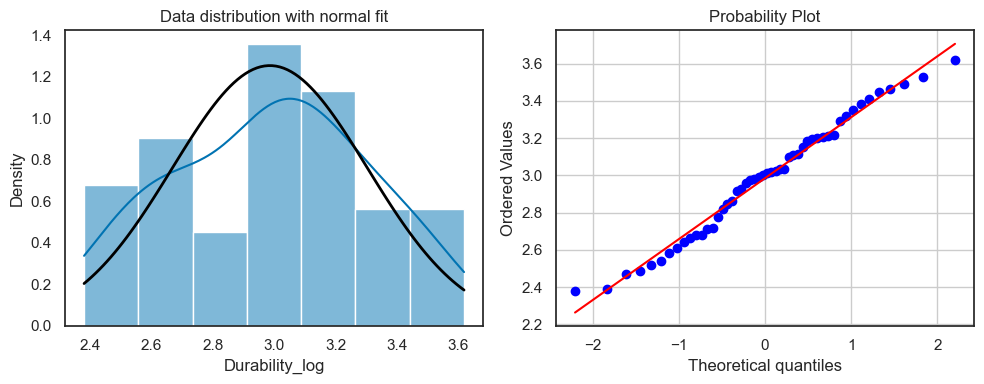

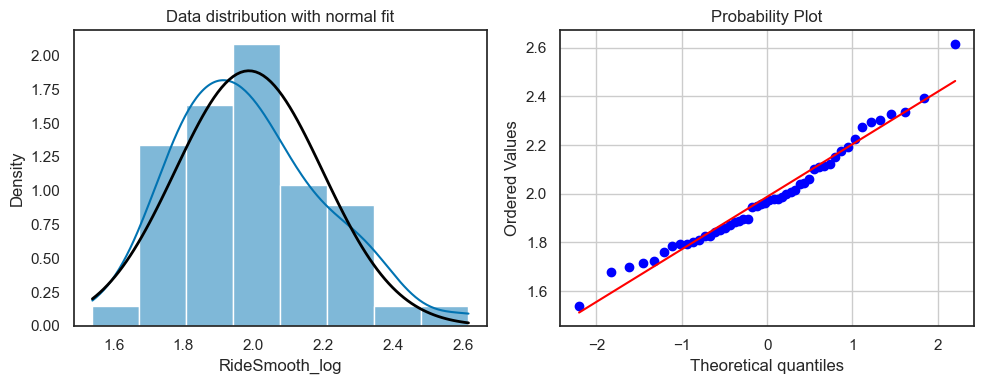

In [11]:
columns_to_transform = ['GearCount', 'BrakeEff', 'Comfort', 'Durability', 'RideSmooth']
for column in columns_to_transform:
    bikes_data[column + '_log'] = np.log(bikes[column])
    plot_normal(bikes_data[column + '_log'])

Po przetworzeniu, wartości cech są zbliżone do rozkładu normalnego. To one właśnie będą wzięte pod uwagę w przygotowaniu oceny innowacyjności. Po transformacji kolumn, za pomocą metody `.drop` usuwamy niepotrzebne kolumny.

In [12]:
bikes_data = bikes_data.drop(columns=columns_to_transform)

In [13]:
bikes_data.describe()

,Weight,AeroEff,WheelSize,FrameSize,MaxSpeed,GearCount_log,BrakeEff_log,Comfort_log,Durability_log,RideSmooth_log
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,14.549052,7.026671,25.941069,55.419484,29.894116,2.037742,0.903218,1.536300,2.985377,1.987347
std,1.867338,1.311487,1.523120,4.468566,5.403428,0.272985,0.077375,0.196892,0.321145,0.213550
min,11.080660,3.070382,23.121843,47.425764,13.793663,1.493714,0.755192,1.075221,2.379767,1.539616
25%,13.278042,6.255833,24.676085,51.280550,26.623215,1.836776,0.843716,1.387177,2.712401,1.831164
50%,14.531710,7.069120,26.025287,55.968187,30.200088,2.050364,0.900438,1.524807,3.007834,1.968174
75%,15.672551,7.880611,26.764781,57.949343,33.732541,2.171149,0.962068,1.673731,3.204587,2.113429
max,18.704556,9.346965,29.694863,68.600846,40.665167,2.963183,1.109239,1.937961,3.618224,2.615776


Dane do dalszej obróbki są gotowe. Kolejnym krokiem jest rzutowanie cech na oś jakości `Q`, tj. skalowanie danych.

### 3. Skalowanie danych

Skalowanie danych polega na zdefiniowaniu wartości średniej oraz odchylenia standardowego każdej z cech. Następnie, wartość średnia przyjmuje wartość 0, natomiast jednostką staje się wartość odchylenia standardowego. Przyjmuje się również, że wszystkie wartości mniejsze od -6 sigma i większe od 6 sigma są ograniczane do wspomnianych -6s i +6s. Transformacja realizowana jest przez funkcję `rescale_values` która przyjmuje dwa argumenty:
- wartości cechy  
- informację o tym, czy cecha ma wymiar "im więcej, tym lepiej (`False`)" czy nie(`True`)

In [14]:
inversed_columns = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

processed = {}
for col, inv in zip(bikes_data.columns, inversed_columns):
    processed[col] = rescale_values(bikes_data[col], inv)

bikes_norm = pd.DataFrame(processed)
bikes_norm.describe()

,Weight,AeroEff,WheelSize,FrameSize,MaxSpeed,GearCount_log,BrakeEff_log,Comfort_log,Durability_log,RideSmooth_log
count,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01
mean,-1.278977e-15,1.018075e-15,2.159384e-15,-5.329071e-17,4.818368e-16,1.176836e-15,2.021716e-15,-7.194245e-16,1.261213e-15,-6.661338e-16
std,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00
min,-2.247956e+00,-3.047269e+00,-1.869746e+00,-1.807040e+00,-3.009925e+00,-2.013121e+00,-1.932537e+00,-2.365559e+00,-1.904927e+00,-2.117893e+00
25%,-6.077665e-01,-5.937261e-01,-8.389529e-01,-9.356368e-01,-6.114838e-01,-7.436566e-01,-7.768188e-01,-7.650740e-01,-8.586367e-01,-7.387903e-01
50%,9.381588e-03,3.269574e-02,5.585483e-02,1.240384e-01,5.720043e-02,4.670562e-02,-3.629754e-02,-5.896359e-02,7.063751e-02,-9.069204e-02
75%,6.875642e-01,6.577337e-01,5.462966e-01,5.718936e-01,7.175805e-01,4.936566e-01,7.683080e-01,7.050895e-01,6.895197e-01,5.964028e-01
max,1.876257e+00,1.787170e+00,2.489564e+00,2.979745e+00,2.013611e+00,3.424499e+00,2.689668e+00,2.060715e+00,1.990604e+00,2.972644e+00


### 4. Wyznaczenie wartości pól  

Tak przygotowana tabela zawierająca znormalizowane wartości numeryczne badanych cech stanowi podstawę do wyznaczenia `nowości`, `pola powierchni` oraz `ćwiartki`, w której znajduje się dana cecha w badanym systemie technicznym. Tabelę z wynikami dla pierwszego analizowanego produktu przedstawiono poniej.

--------------------------------------------------------------------------------

     feature_name attribute   quality  novelty   area quarter
0          Weight        MB -0.781348   -1.464  1.144      Q3
1         AeroEff        MB  0.353888   -0.839  0.297      Q2
2       WheelSize         A -1.368953    0.527  0.722      Q4
3       FrameSize         A  0.188301    1.099  0.207      Q1
4        MaxSpeed        LQ -1.158795   -1.159  1.343      Q3
5   GearCount_log        MB  0.191327   -0.909  0.174      Q2
6    BrakeEff_log        LQ -1.124295   -1.124  1.264      Q3
7     Comfort_log        LQ  0.132786    0.133  0.018      Q1
8  Durability_log        LQ -1.458571   -1.459  2.127      Q3
9  RideSmooth_log        LQ  0.000554    0.001  0.000      Q1

--------------------------------------------------------------------------------



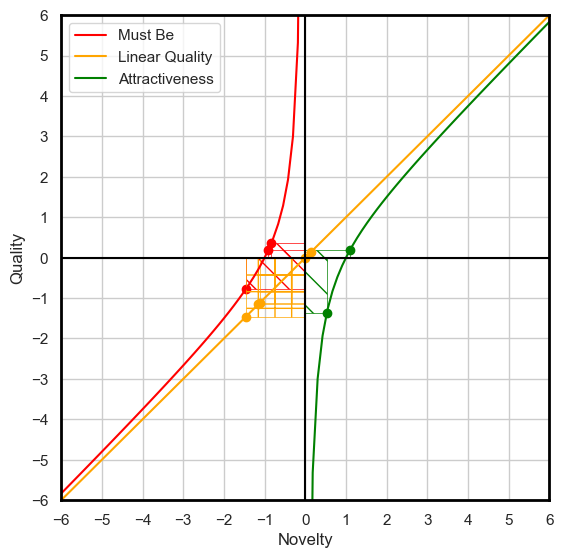


--------------------------------------------------------------------------------

Effective innovation:
Feature Name = FrameSize , Quality = 0.18830146053672017
Features in Q1:  ['FrameSize' 'Comfort_log' 'RideSmooth_log']
********************************************************************************
Standard solutions area:
Feature Name = AeroEff , Quality = 0.35388769532680625
Features in Q2:  ['AeroEff' 'GearCount_log']
********************************************************************************
Design error field:
Feature Name = Durability_log , Quality = -1.4585710382430006
Features in Q3:  ['Weight' 'MaxSpeed' 'BrakeEff_log' 'Durability_log']
********************************************************************************
Ineffective innovation:
Feature Name = WheelSize , Quality = -1.3689534392715363
Features in Q4:  ['WheelSize']


In [15]:
# ---------- Input data ----------
product_no = 0
# --------------------------------

# Prepare data for calculation
features = bikes_norm.columns
qualities = bikes_norm.iloc[product_no].values
attributes = bikes_attr.iloc[0, 2:].values

# Calculate data for a single product
results = calculate_results(features, qualities, attributes)
print_results(results)

### 5. Sformułowanie oceny  

Ten krok polega na interpretacji kazdej z cech poprzez identyfikację, do jakiej ćwiartki układu nalezy odpowiadający jej punkt.  

Jeśli jest to ćwiartka pierwsza (`ćwiartka efektywnej innowacji`) oznacza to, ze cecha ta będzie postrzegana jako atrakcyjna dla uzytkowników.  

Cechy znajdujące się w ćwiartce drugiej (`ćwiartka zastosowania rozwiązań standardowych`) oznaczają spełnienie podstawowych wymagań i nie dodają wartości dla uzytkowników.  

Ćwiartka trzecia (`ćwiartka ryzyka błędu projektowego`) odnosi się do cech, które są istotne dla uzytkownikow, a jednoczesnie cechują się jakością gorszą od obecnie występujących na rynku.  

Czwarta ćwiartka (`ćwiartka nieefektywnej innowacji`) oznacza te cechy, które są postrzegane jako nowe i atrakcyjne, ale ich nizsza jakość nie stanowi o braku zadowolenia uzytkowników. 

In [16]:
# Define ideality
ideality = {}
for i in range(0, len(bikes_norm)):
    qualities = bikes_norm.iloc[i].values
    results = calculate_results(features, qualities, attributes)
    q1_sum = results[results['quarter'] == 'Q1']['area'].sum()
    q2_sum = results[results['quarter'] == 'Q2']['area'].sum()
    q3_sum = results[results['quarter'] == 'Q3']['area'].sum()
    q4_sum = results[results['quarter'] == 'Q4']['area'].sum()
    ideality[i] = (q1_sum + q2_sum) / (q1_sum + q2_sum + q3_sum + q4_sum)

ideality_df = pd.DataFrame(ideality.items(), columns=['ProductID', 'Ideality'])


In [17]:
# Find top and worst products
top_product = ideality_df['Ideality'].idxmax()
worst_product = ideality_df['Ideality'].idxmin()

print(f'Top product: {bikes.iloc[top_product]["Name"]} with ideality of {ideality_df.iloc[top_product]["Ideality"]:.2f}')
print(f'Worst product: {bikes.iloc[worst_product]["Name"]} with ideality of {ideality_df.iloc[worst_product]["Ideality"]:.2f}')

Top product: Bicycle 29 with ideality of 0.91
Worst product: Bicycle 43 with ideality of 0.06


--------------------------------------------------------------------------------

     feature_name attribute   quality  novelty   area quarter
0          Weight        MB  0.405897   -0.817  0.332      Q2
1         AeroEff        MB  0.085473   -0.958  0.082      Q2
2       WheelSize         A  0.138219    1.071  0.148      Q1
3       FrameSize         A -0.393966    0.822  0.324      Q4
4        MaxSpeed        LQ  0.085041    0.085  0.007      Q1
5   GearCount_log        MB -0.801389   -1.478  1.184      Q3
6    BrakeEff_log        LQ  0.772796    0.773  0.597      Q1
7     Comfort_log        LQ  2.060715    2.061  4.247      Q1
8  Durability_log        LQ  1.044770    1.045  1.092      Q1
9  RideSmooth_log        LQ  2.972644    2.973  8.837      Q1

--------------------------------------------------------------------------------



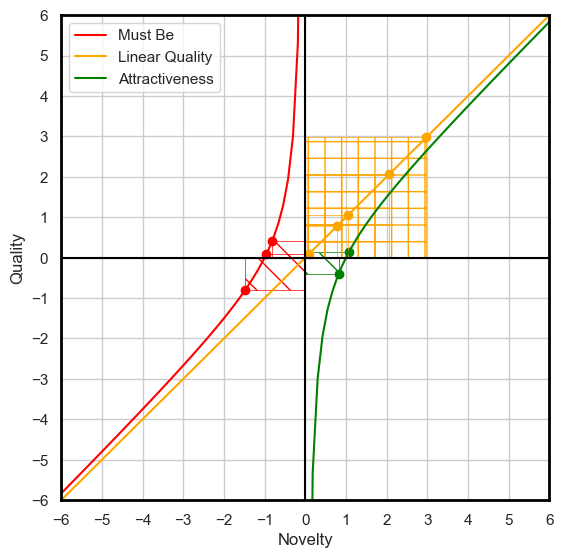


--------------------------------------------------------------------------------

Effective innovation:
Feature Name = RideSmooth_log , Quality = 2.972643782650896
Features in Q1:  ['WheelSize' 'MaxSpeed' 'BrakeEff_log' 'Comfort_log' 'Durability_log'
 'RideSmooth_log']
********************************************************************************
Standard solutions area:
Feature Name = Weight , Quality = 0.40589732591146716
Features in Q2:  ['Weight' 'AeroEff']
********************************************************************************
Design error field:
Feature Name = GearCount_log , Quality = -0.8013889902217874
Features in Q3:  ['GearCount_log']
********************************************************************************
Ineffective innovation:
Feature Name = FrameSize , Quality = -0.39396566479047473
Features in Q4:  ['FrameSize']


In [18]:
# Top product results
top_qualities = bikes_norm.iloc[top_product].values
top_results = calculate_results(features, top_qualities, attributes)
print_results(top_results)

--------------------------------------------------------------------------------

     feature_name attribute   quality  novelty   area quarter
0          Weight        MB -0.118822   -1.061  0.126      Q3
1         AeroEff        MB -0.831661   -1.499  1.247      Q3
2       WheelSize         A -1.560071    0.488  0.762      Q4
3       FrameSize         A  0.147160    1.076  0.158      Q1
4        MaxSpeed        LQ -0.531104   -0.531  0.282      Q3
5   GearCount_log        MB  0.327502   -0.850  0.278      Q2
6    BrakeEff_log        LQ  0.277798    0.278  0.077      Q1
7     Comfort_log        LQ -1.540923   -1.541  2.374      Q3
8  Durability_log        LQ -1.904927   -1.905  3.629      Q3
9  RideSmooth_log        LQ  0.133047    0.133  0.018      Q1

--------------------------------------------------------------------------------



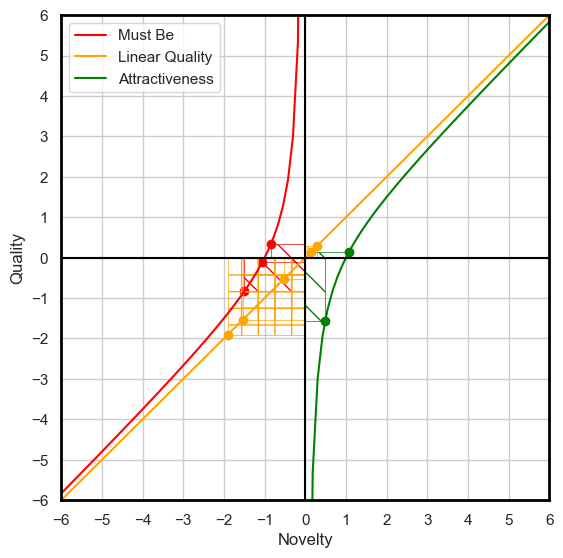


--------------------------------------------------------------------------------

Effective innovation:
Feature Name = FrameSize , Quality = 0.1471600144365596
Features in Q1:  ['FrameSize' 'BrakeEff_log' 'RideSmooth_log']
********************************************************************************
Standard solutions area:
Feature Name = GearCount_log , Quality = 0.327501910386365
Features in Q2:  ['GearCount_log']
********************************************************************************
Design error field:
Feature Name = Durability_log , Quality = -1.904927077450083
Features in Q3:  ['Weight' 'AeroEff' 'MaxSpeed' 'Comfort_log' 'Durability_log']
********************************************************************************
Ineffective innovation:
Feature Name = WheelSize , Quality = -1.5600705621713873
Features in Q4:  ['WheelSize']


In [19]:
# Worst product results
worst_qualities = bikes_norm.iloc[worst_product].values
worst_results = calculate_results(features, worst_qualities, attributes)
print_results(worst_results)